### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json, load_json_model
from pymodulon.enrichment import *

### Read in all ica object files

In [2]:
tpm = pd.read_csv('logTPM_norm_file.csv',index_col='gene_id')
tpm.index = tpm.index.where(~tpm.index.duplicated(), tpm.index + '_1')

updated_gene_index = []
for index in tpm.index:
    updated_gene_index.append(index.replace('gene-',''))

tpm.index = updated_gene_index

gene_table = pd.read_csv('yarrowia_NCBI_table.csv',index_col='Locus tag')
sample_table = pd.read_table('final_metadata_file.tsv', index_col='Unnamed: 0')


### Add in tables to ICA object

In [3]:
A = pd.read_csv('A.csv',index_col='Unnamed: 0')
M = pd.read_csv('S.csv',index_col='gene_id')
TRN = pd.read_csv('yarrowiaTRN.csv',index_col = 'Unnamed: 0')

# Remove duplicate gene names
M.index = M.index.where(~M.index.duplicated(), M.index + '_1')
gene_table.index = gene_table.index.where(~gene_table.index.duplicated(), gene_table.index + '_1')

updated_gene_index = []
for index in M.index:
    updated_gene_index.append(index.replace('gene-',''))

M.index = updated_gene_index


# Filter out ribosomal and mitochondrial RNA (not annotated in NCBI gene table?)


available_M_genes = []

for i in M.index:
    if(i in gene_table.index.tolist()):
        available_M_genes.append(i)

M = M.loc[available_M_genes]
tpm = tpm.loc[available_M_genes]


# Create ICA object 
ica_data = IcaData(M,A)
ica_data.X = tpm
ica_data.gene_table = gene_table
ica_data.sample_table = sample_table
ica_data.trn = TRN

### Apply M matrix thresholds to obtain filtered imodulons

In [4]:
test_data = IcaData(ica_data.M,
                    ica_data.A,
                    trn=ica_data.trn,
                    threshold_method='dagostino')

### Enrich imodulons

In [5]:
imodulon_genes = list(test_data.view_imodulon(1).index)
enriched_regulons = compute_trn_enrichment(imodulon_genes,M.index,TRN)

imodulon_table = enriched_regulons
imodulon_name = []
j = 0

for i in range(2,M.shape[1]):
    imodulon_genes = list(test_data.view_imodulon(i).index)
    enriched_regulons = compute_trn_enrichment(imodulon_genes,M.index,TRN)
    
    if(enriched_regulons.shape[0]):
        imodulon_table = pd.concat([imodulon_table,enriched_regulons.iloc[0,:]],axis=1)
        imodulon_name.append(enriched_regulons.iloc[0].name)
        
    else:
        imodulon_table = pd.concat([imodulon_table,enriched_regulons],axis=1)
        imodulon_name.append('Uncharacterized_'+str(j))
        j = j+1

ica_data.compute_trn_enrichment(save=True)
ica_data.imodulon_table

/usr/local/lib/python3.8/dist-packages/pymodulon/core.py:610: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  keep_cols = self.imodulon_table.loc[


,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs
0,HAP4,1.320425e-08,8.841645e-07,0.036750,0.351852,0.066550,19.0,54.0,517.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GCN4,5.959733e-13,5.542552e-11,0.289855,0.083565,0.129730,60.0,718.0,207.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Add regulator names to imodulons

In [6]:
# imodulon_names = []

# j = 1
# for regulator in ica_data.imodulon_table['regulator']:
#     if(pd.isna(regulator)):
#         imodulon_names.append('Uncharacterized_'+str(j))
#         j = j+1
#     else:
#         imodulon_names.append(regulator)
        
# ica_data.imodulon_table.index = imodulon_names
# ica_data.imodulon_table

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


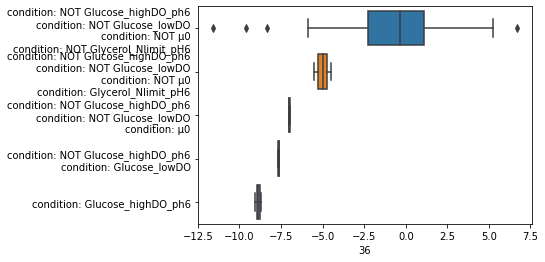

In [8]:
from pymodulon.plotting import *
metadata_boxplot(ica_data,36,n_boxes=5,use_cols=['condition'],
                 show_points=False);

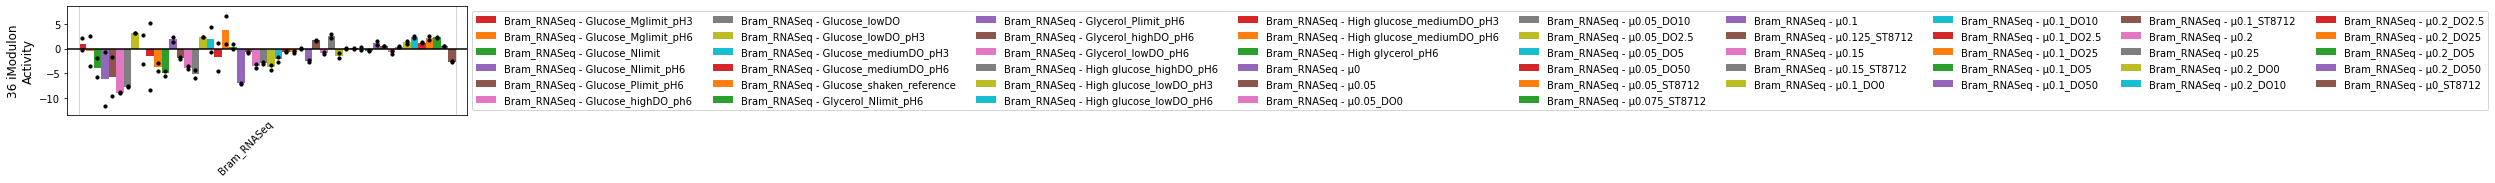

In [28]:
plot_activities(ica_data,36,projects='Bram_RNASeq');

/usr/local/lib/python3.8/dist-packages/pymodulon/plotting.py:467: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  reg_arr = ica_data.M[imodulon].loc[reg_genes]
/usr/local/lib/python3.8/dist-packages/pymodulon/plotting.py:468: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  non_reg_arr = ica_data.M[imodulon].loc[non_reg_genes]


<AxesSubplot:xlabel='36 Gene Weight', ylabel='Number of Genes'>

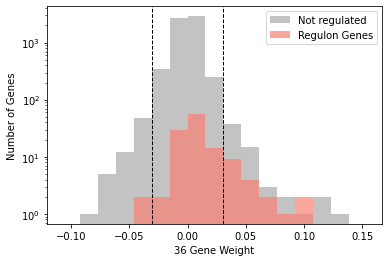

In [42]:
plot_regulon_histogram(ica_data,36,'HSF1')